In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

[feat_viz INFO] Loaded 453 genes
[feat_viz INFO] Kept 243 genes with max expr > 0.001 
[feat_viz INFO] Kept 45 high zone genes with geom avg > 3.5 
[feat_viz INFO] Kept 64 low zone genes with geom avg < 1 


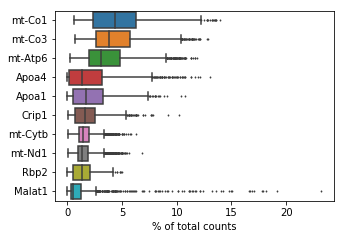

Input: 27998 genes; 1383 samples


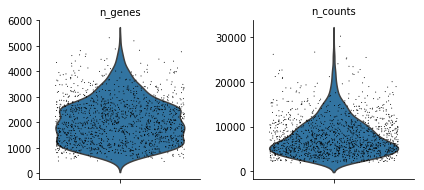

Filtered out: 17097 genes; remaining 10901


[feat_viz INFO] Keeping 9656 / 10901 genes with log1p and std > 0.1
[feat_viz INFO] Log-transformed anndata
[feat_viz INFO] Kept 10877 / 10901 genes with log filter at 0.05
[feat_viz INFO] Kept 9656 / 10901 genes with log filter at 0.1
[feat_viz INFO] Kept 8278 / 10901 genes with log filter at 0.15
[feat_viz INFO] Kept 7018 / 10901 genes with log filter at 0.2
[feat_viz DEBUG] Data (shape (1383, 2)) saved as: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/obs_info.csv
[feat_viz DEBUG] Data (shape (9656, 5)) saved as: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/var_info.csv
[feat_viz DEBUG] Data (shape (1383, 9656)) saved as: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/matrix_unscaled.csv
[feat_viz DEBUG] Data (shape (1383, 9656)) saved as: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/matrix_unscaled.npy


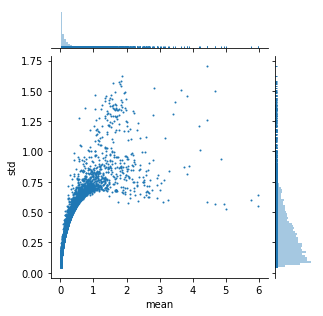

In [2]:
from intestine_info import load_enterocyte_data, output_processed_enterocyte_data
from intestine_info import get_intestine_rna_lm_genes

from scrna_utils import transform_filter_anndata
logger.setLevel(logging.DEBUG)

dat_dir = "/share/PI/sabatti/sc_data/intestine2k"
res_dir = "/share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719"

lm_genes = get_intestine_rna_lm_genes()
adata = load_enterocyte_data(dat_dir, verbose = True)
adata = transform_filter_anndata(adata, scale_pfx="original")
output_processed_enterocyte_data(res_dir, adata)

In [3]:
# test loading
from intestine_info import load_processed_enterocyte_data
obs_df, var_df, mtx = load_processed_enterocyte_data(res_dir)

[feat_viz DEBUG] Data (shape (1383, 2)) loaded from: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/obs_info.csv
[feat_viz DEBUG] Data (shape (9656, 5)) loaded from: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/var_info.csv
[feat_viz DEBUG] Data (shape (1383, 9656)) loaded from: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data/data/matrix_unscaled.npy


# Read the raw gene expresison data (UMI count)

In [4]:
from intestine_info import load_enterocyte_raw_data
raw_dat = load_enterocyte_raw_data(dat_dir)
print(raw_dat.shape)
raw_dat.head()

(1383, 27998)


Xkr4  Gm1992  Gm37381  Rp1  Rp1.1  Sox17  Gm37323  Mrpl15  \
cell_id                                                                       
AAACCTGGTAAGTTCC     0       0        0    0      0      0        0       0   
AAACGGGCACCAACCG     0       0        0    0      0      0        0       0   
AAACGGGTCACTGGGC     0       0        0    0      0      0        0       0   
AAAGATGGTGGACGAT     0       0        0    0      0      0        0       0   
AAAGATGGTTCGGGCT     0       0        0    0      0      0        0       2   

                  Lypla1  Gm37988       ...        AC125149.1  AC125149.2  \
cell_id                                 ...                                 
AAACCTGGTAAGTTCC       1        0       ...                 0           0   
AAACGGGCACCAACCG       2        0       ...                 0           0   
AAACGGGTCACTGGGC       2        0       ...                 0           0   
AAAGATGGTGGACGAT       4        0       ...                 0           0   
AAAGATGGTTCGGGCT       1        0       ...                 0           0   

                  AC125149.4  AC234645.1  AC168977.2  AC168977.1  PISD  DHRSX  \
cell_id                                                                         
AAACCTGGTAAGTTCC           0           0           0           0     0      1   
AAACGGGCACCAACCG           0           0           0           0     0      0   
AAACGGGTCACTGGGC           0           0           0           0     1      2   
AAAGATGGTGGACGAT           0           0           0           0     0      0   
AAAGATGGTTCGGGCT           0           0           0           0     1      0   

                  Vmn2r122  CAAA01147332.1  
cell_id                                     
AAACCTGGTAAGTTCC         0               0  
AAACGGGCACCAACCG         0               0  
AAACGGGTCACTGGGC         0               0  
AAAGATGGTGGACGAT         0               0  
AAAGATGGTTCGGGCT         0               0  

[5 rows x 27998 columns]

In [45]:
use_genes = set(adata.var_names)
high_genes = list(set(lm_genes["high"]).intersection(use_genes))
logger.info("Number of high genes: {}".format(len(high_genes)))
low_genes = list(set(lm_genes["low"]).intersection(use_genes))
logger.info("Number of low genes: {}".format(len(low_genes)))

[feat_viz INFO] Number of high genes: 35
[feat_viz INFO] Number of low genes: 62


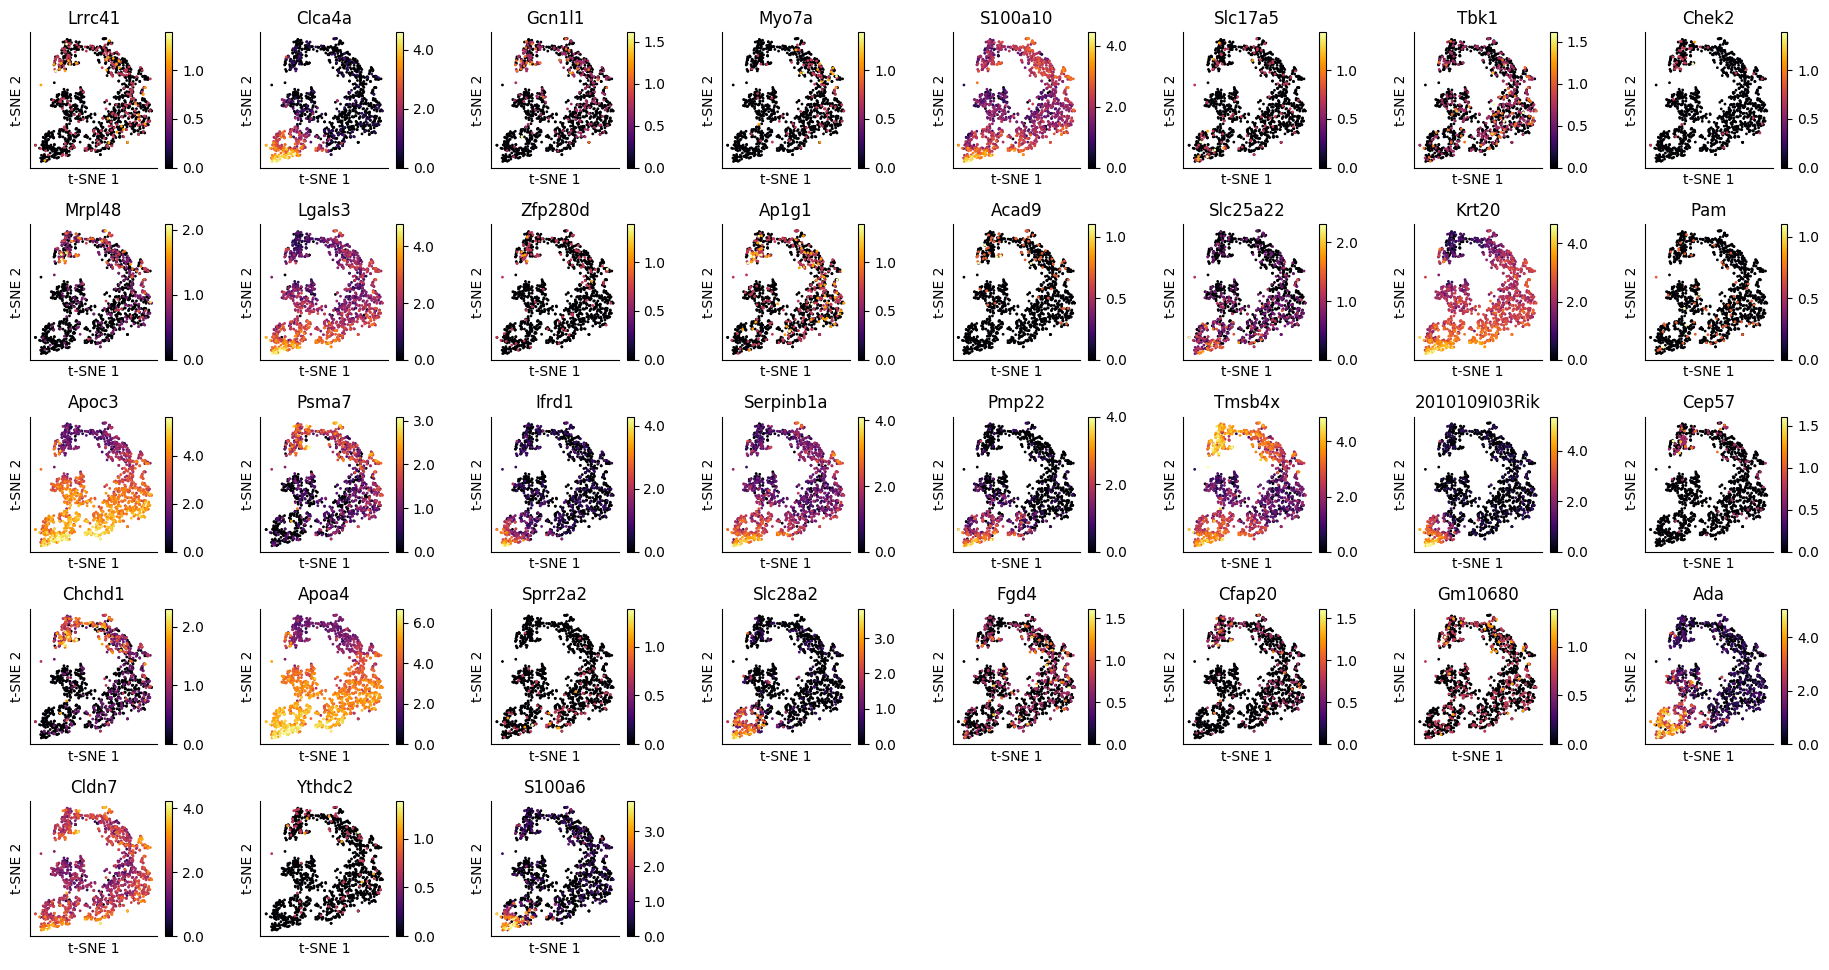

In [46]:
from plot_utils import plot_multi_scatter_discrete
proj = cell_df[["tSNE_coordinate_1", "tSNE_coordinate_2"]]
plot_multi_scatter_discrete(raw_dat[high_genes], proj)

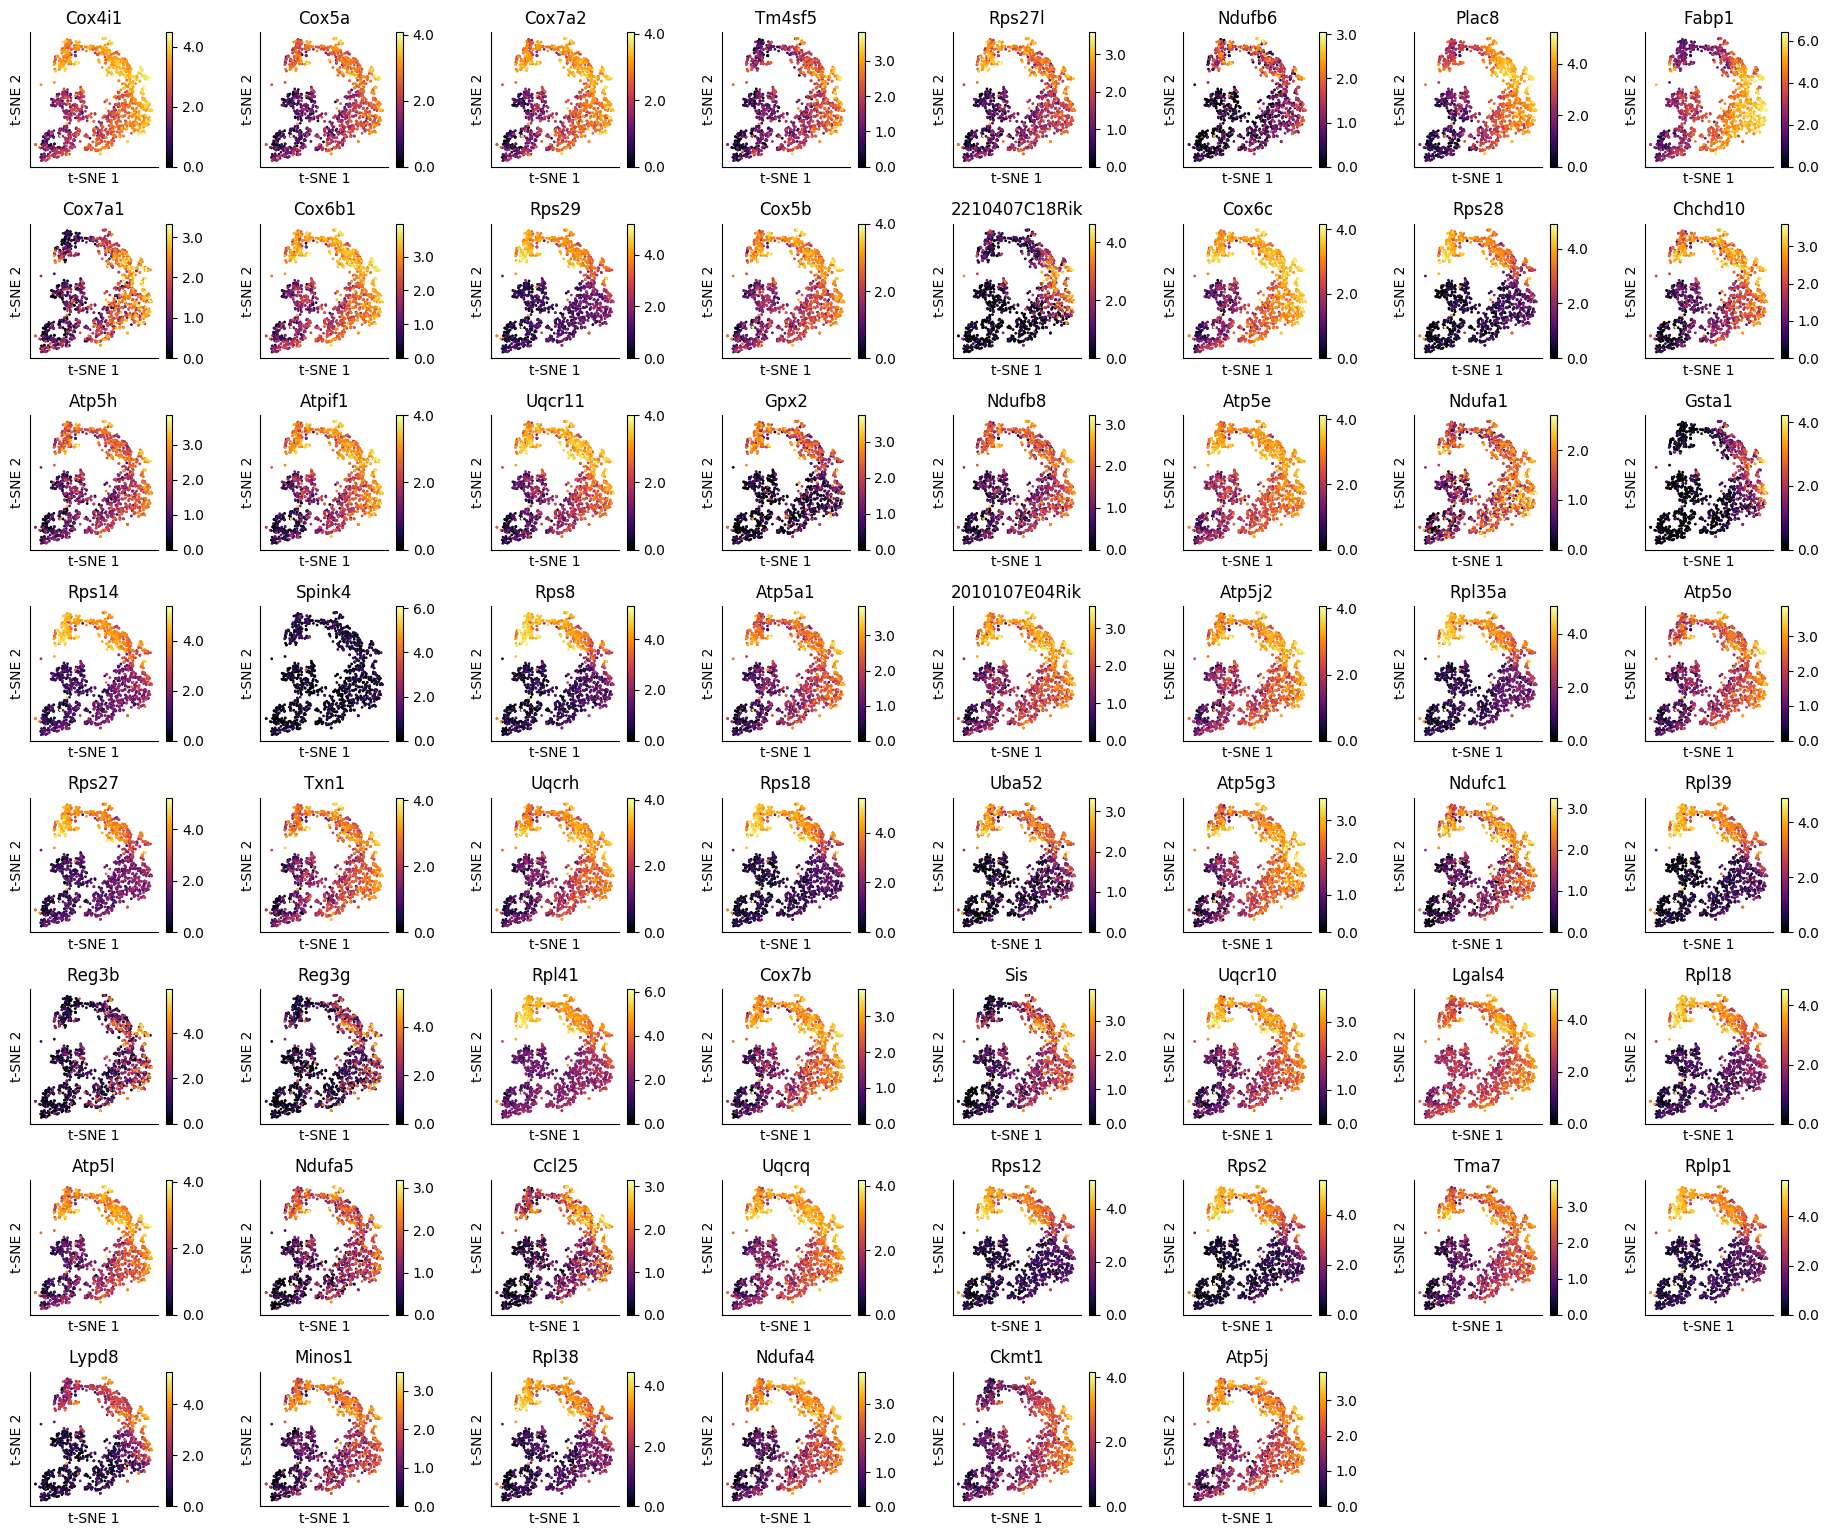

In [47]:
plot_multi_scatter_discrete(raw_dat[low_genes], proj)

# Read the cell meta-information (t-SNE, zonation)

Note: the cell ids do not match - probably a bug from the paper (but things look ok when in order...)

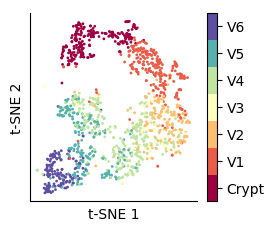

tSNE_coordinate_1  tSNE_coordinate_2 zone
cell_id                                                    
AAACCTGGTAAGTTCC          12.518369         -16.735935   V3
AAACGGGCACCAACCG          -3.619842          -5.642620   V5
AAACGGGTCACTGGGC          13.622892          16.828087   V1
AAAGATGGTGGACGAT          15.653014           3.311508   V2
AAAGATGGTTCGGGCT           6.754220          20.791256   V1

In [31]:
from intestine_info import load_enterocyte_meta_data
cell_df = load_enterocyte_meta_data(dat_dir)
cell_df.head()

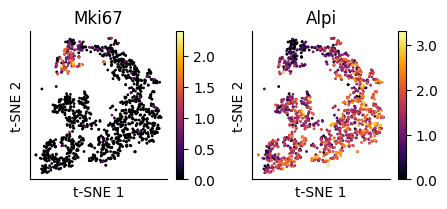

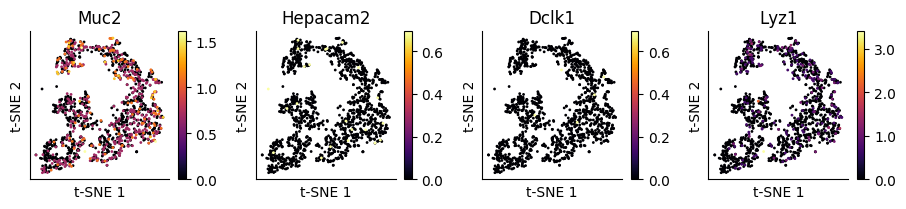

In [32]:
plot_multi_scatter_discrete(raw_dat[["Mki67", "Alpi"]], proj)
cell_t_genes = ["Muc2", "Hepacam2", "Dclk1", "Lyz1"]
plot_multi_scatter_discrete(raw_dat[cell_t_genes], proj)

# Read the genes of interest

The original paper used 43 low and 62 high landmark genes - we reproduce the numbers here

In [23]:
high_genes = list(set(lm_genes["high"]).intersection(set(raw_dat.columns)))
logger.info("Number of high genes: {}".format(len(high_genes)))
low_genes = list(set(lm_genes["low"]).intersection(set(raw_dat.columns)))
logger.info("Number of low genes: {}".format(len(low_genes)))

[feat_viz INFO] Loaded 453 genes
[feat_viz INFO] Kept 243 genes with max expr > 0.001 
[feat_viz INFO] Kept 45 high zone genes with geom avg > 3.5 
[feat_viz INFO] Kept 64 low zone genes with geom avg < 1 
[feat_viz INFO] Number of high genes: 43
[feat_viz INFO] Number of low genes: 62


In [27]:
from intestine_info import get_smFISH_validated_genes
smFISH_genes = get_smFISH_validated_genes()
smFISH_genes = list(smFISH_genes.intersection(set(raw_dat.columns)))
logger.info("Intersect {} smFISH genes".format(len(smFISH_genes)))
print(smFISH_genes)

[feat_viz INFO] Loaded 23 smFISH genes
[feat_viz INFO] Intersect 22 smFISH genes


['Enpep', 'Rpl3', 'Gstm3', 'Cps1', 'Pigr', 'Apoa1', 'Neat1', 'Rpl4', 'Nlrp6', 'Fos', 'Klf4', 'Slc2a2', 'Reg1', 'Malat1', 'Cdh1', 'Junb', 'Reg3g', 'Slc5a1', 'Slc28a2', 'Nt5e', 'Ada', 'Apob']


In [28]:
print(len(set(smFISH_genes).intersection(set(high_genes))))
print(len(set(smFISH_genes).intersection(set(low_genes))))

2
1


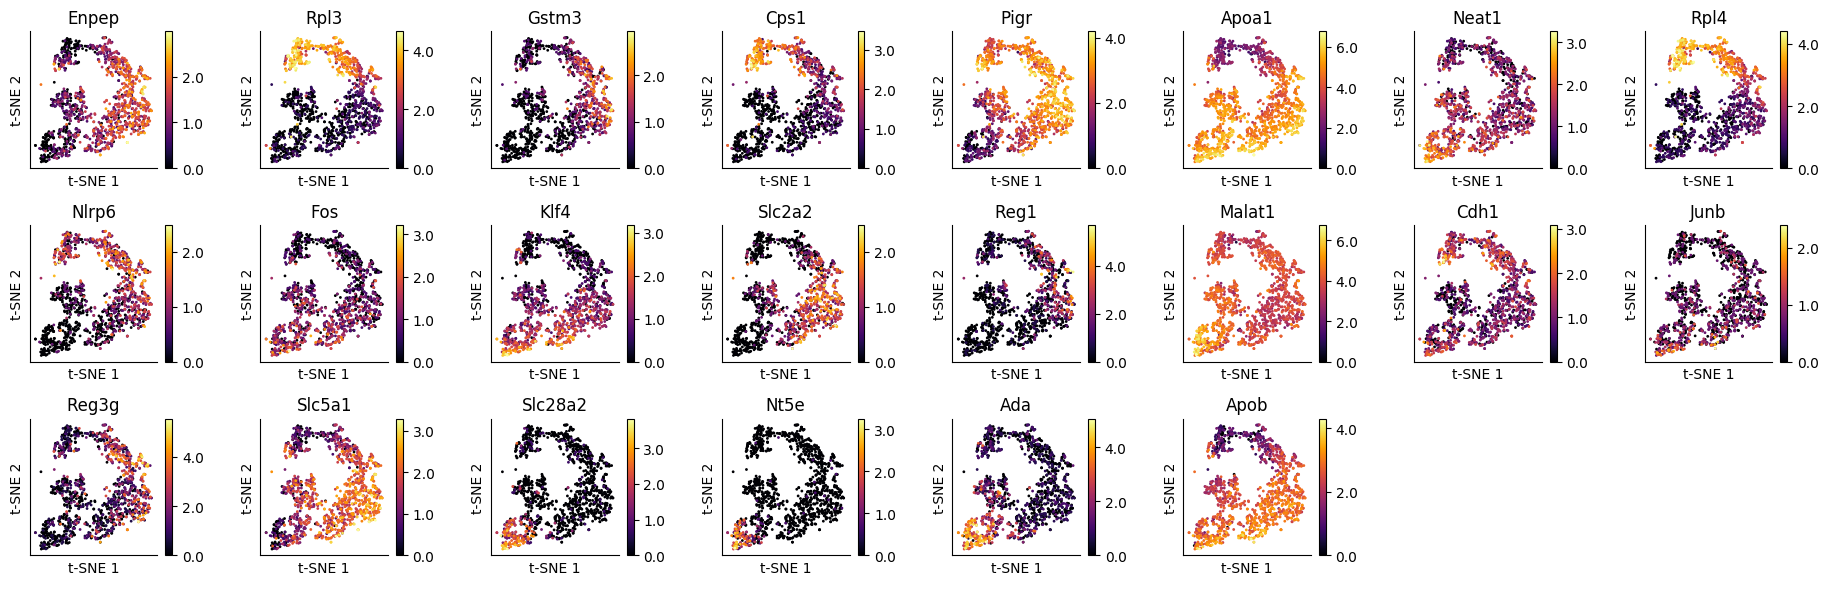

In [33]:
plot_multi_scatter_discrete(raw_dat[smFISH_genes], proj)

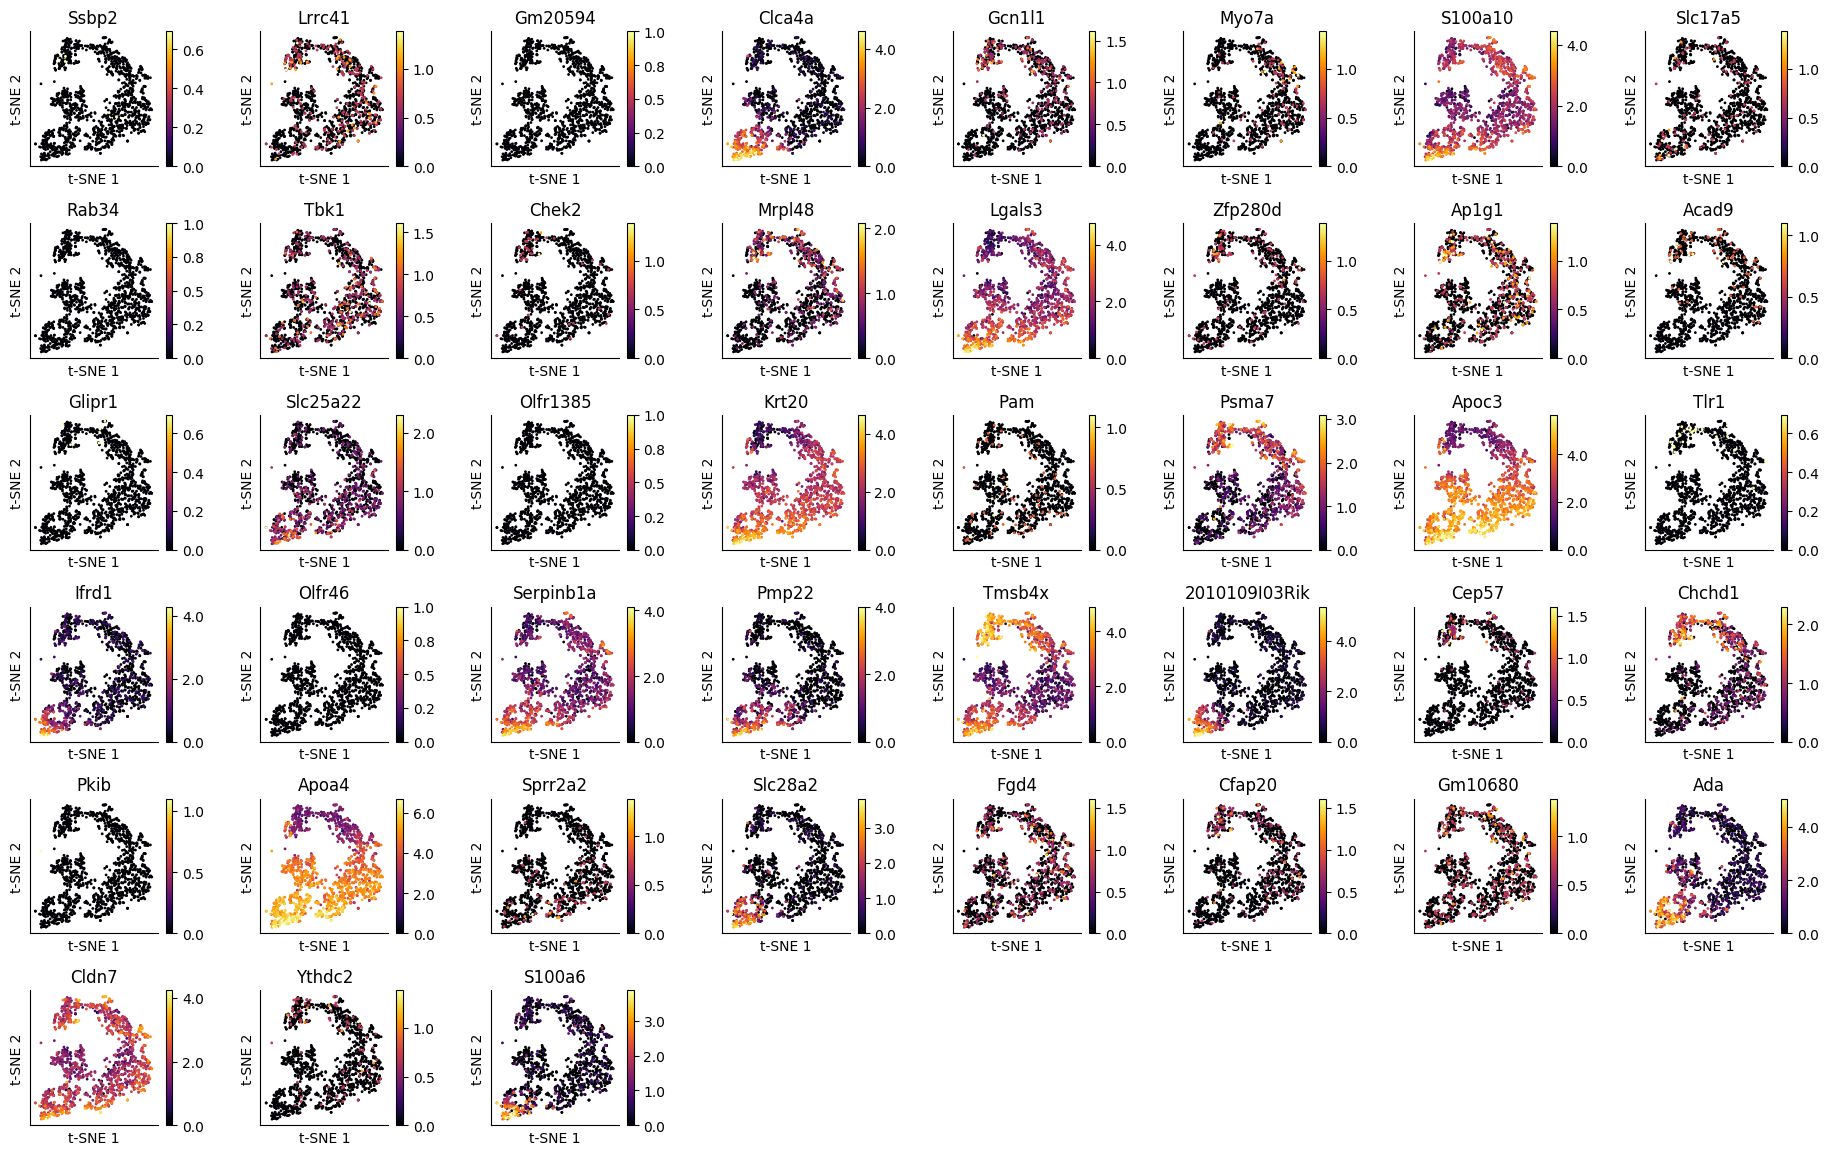

In [34]:
plot_multi_scatter_discrete(raw_dat[high_genes], proj)

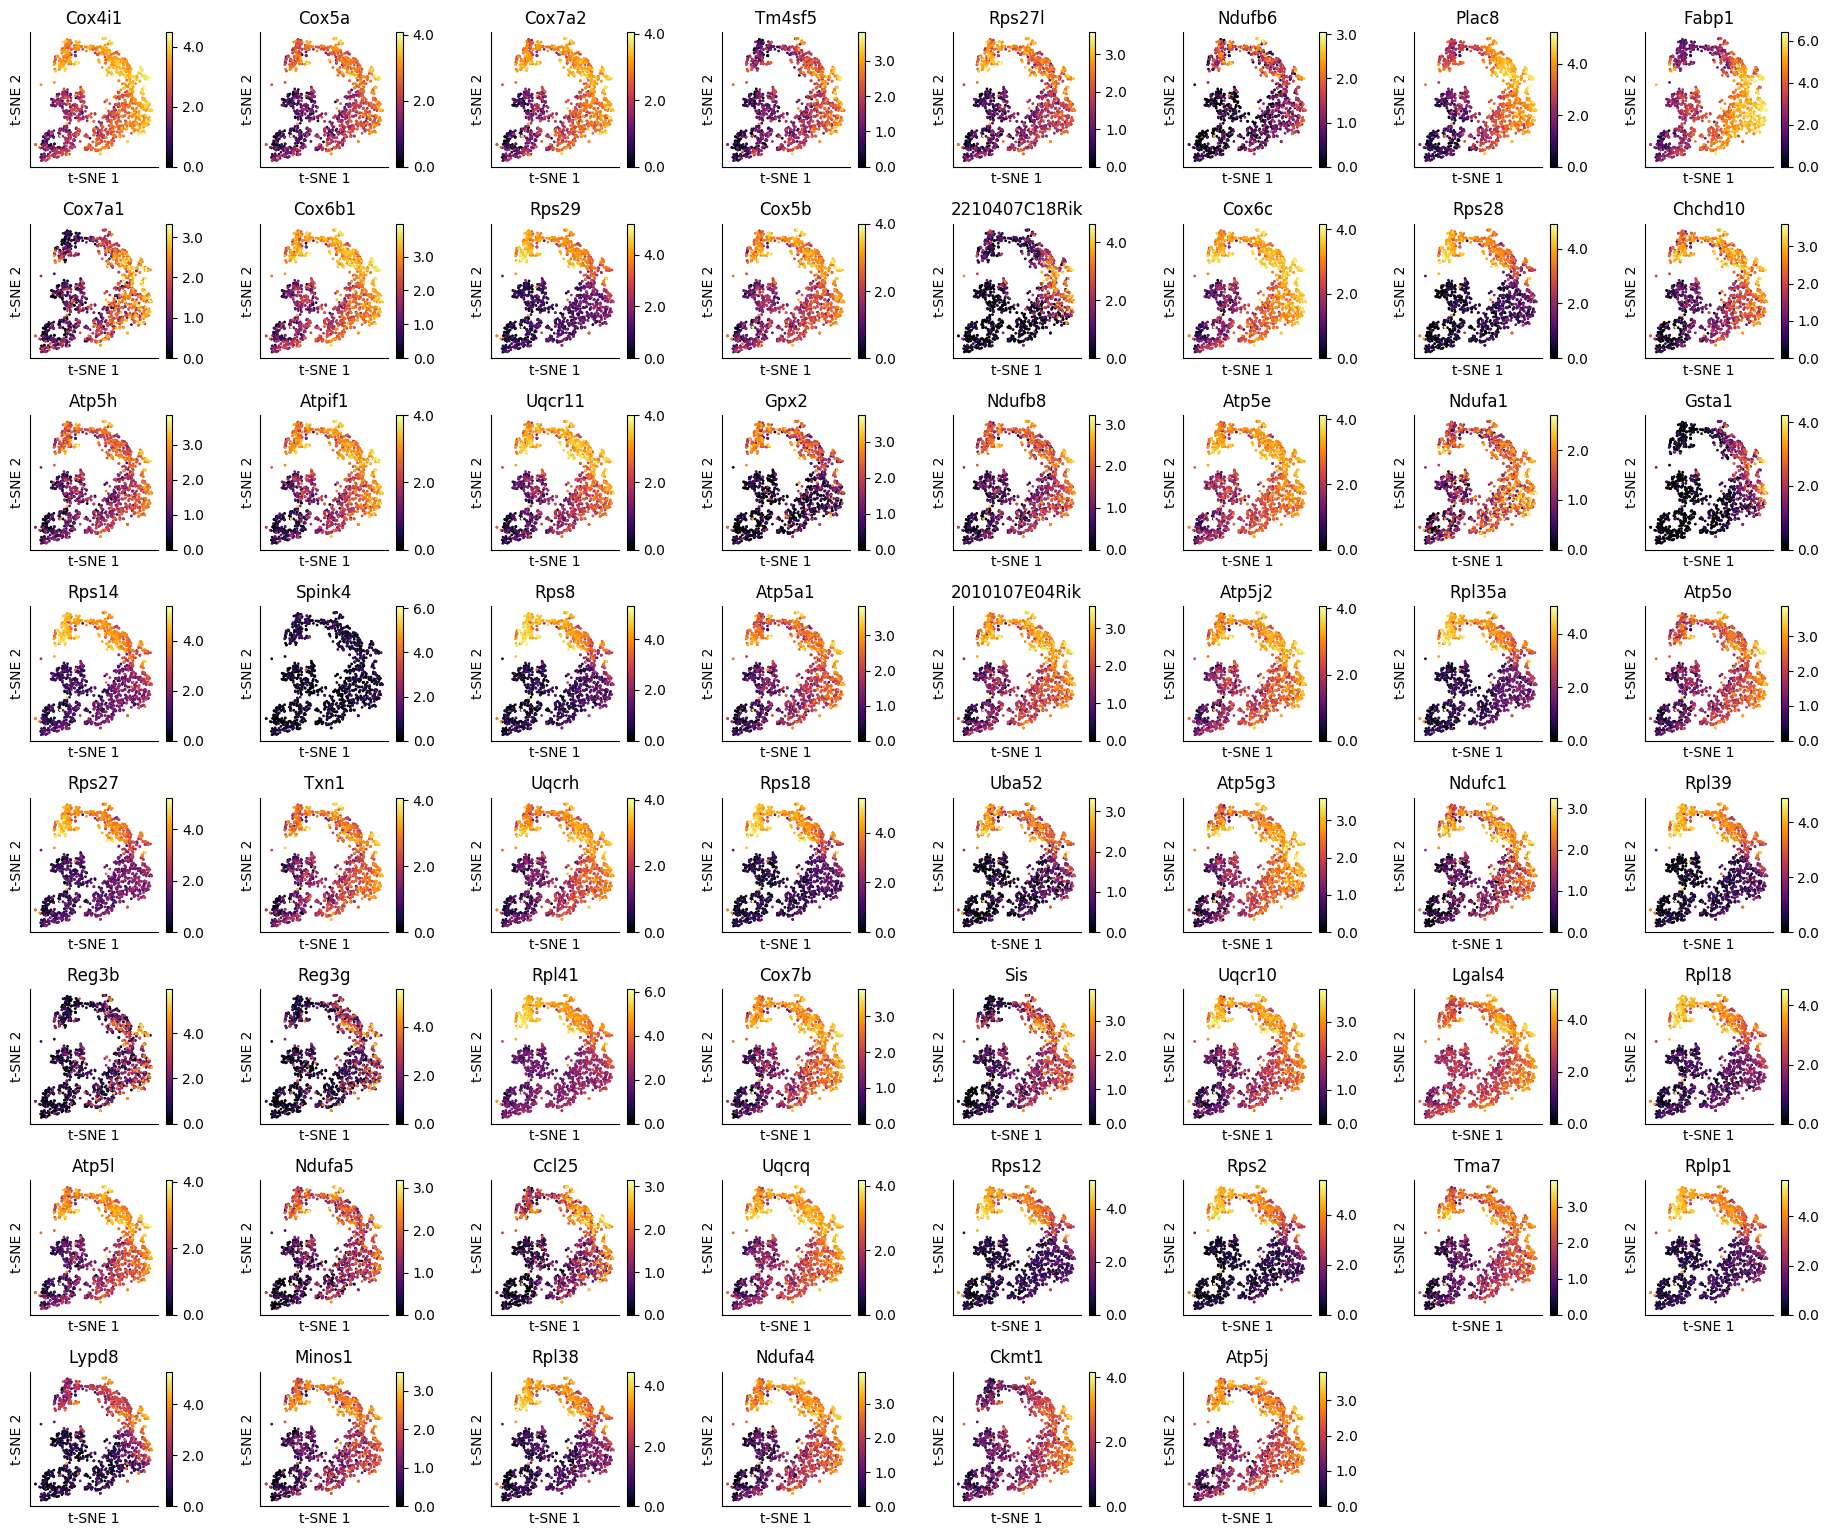

In [35]:
plot_multi_scatter_discrete(raw_dat[low_genes], proj)